## Examen

* Es necesario seguir los lineamientos ya preestablecidos.

* Habrá cero tolerancia al plagio.

* Sólo podrás hacer uso de las libretas que tengas, no se permite el uso de ChatGPT.

* Todas las soluciones deben presentarse de manera lógica. Se penalizará la ausencia de argumentos y de documentación.

**Ejercicio 1:**

¿Qué es una clase y por qué es útil? \\
Define una clase con un ejemplo, dando todas sus características.

---

In [83]:
#Una clase es una estructura de programación donde se crea un tipo de objeto, lo que la clase hace es asignarle funciones, metodos, atributos, entre otras a este objeto.
#En una clase en Python ademas se pueden usar las definiciones de métodos y atributos, que sirven para describir el comportamiento y las características de los objetos que se crearán a partir de esa clase.
#Usando el ejmeplo de la Tarea 2 Unidad 2 donde tenemos la clase Asset podemos ver que:

class Asset:
    def __init__(self, ticker, start_date, end_date=datetime.today().strftime('%Y-%m-%d')): #__init__ es un metodo que inicializa los atributos a su derecha.
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.data = self.get_data()   #ticker, start_date y end_date por ejemplo son atributos.

    def get_data(self): #get_data es otro metodo para descargar los datos de yfinance, por ejemplo start_date.
        df = yf.download(self.ticker, start=self.start_date, end=self.end_date) #aqui por ejemplo se usa la funcion yf.download para descargar informacion de Yahoo finance.
        return df

    def simple_returns(self, adj=False, cum=False):#metodo
        if adj:
            simple_returns = self.data["Adj Close"].pct_change().dropna()
        else:
            simple_returns = self.data["Close"].pct_change().dropna()
        if cum:
            simple_returns = (1 + simple_returns).cumprod() - 1
        return simple_returns
#Aqui estan los nuevos atributos
    def calculate_compound_return(self):
        simple_returns = self.simple_returns()
        compound_return = (1 + simple_returns).prod() - 1
        return compound_return

    def annualize_returns(self, rendimiento_periodo, periodos_por_anio):
        return (1 + rendimiento_periodo) ** periodos_por_anio - 1

NameError: ignored

**Ejercicio 2:**

En Python, un **constructor** es un método especial que se llama automáticamente cuando se crea un objeto. Se utiliza para inicializar los atributos del objeto y realizar cualquier tarea de configuración necesaria antes de su uso. \\

Para este ejercicio contesta las siguientes preguntas:


1.   ¿Cuál es la sintaxis para definir un constructor dentro de una clase?
2.   Considera el siguiente código: \\

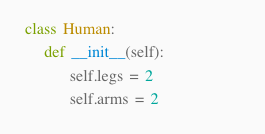

\\
La clase 'Human' tiene un constructor que toma dos parametros, ¿cuáles son?



In [ ]:
#La sintaxis es por medio del metodo __init__ y los dos parametros son legs y arms, que por medio del constructor self se le asigna un valor a ambos de 2.

3. Crea dos atributos (definiciones y polimorfismos) asociados a la clase 'Human´.

---

In [84]:
# Definir una clase 'Human' para representar a una persona
class Human:
    def __init__(self, altura, peso):
        self.legs = 2
        self.arms = 2
        self.altura = altura
        self.peso = peso

    def imc(self):
        # Calcular el índice de masa corporal (IMC) de la persona
        return self.peso / (self.altura ** 2)

# Crear una instancia 'persona' de la clase 'Human' con altura 1.90 m y peso 90 kg
persona = Human(1.90, 90)

# Calcular el IMC de la persona
IMC = persona.imc()

# Imprimir el valor del IMC
print("IMC:", IMC)





IMC: 24.930747922437675


**Ejercicio 3:**

Indica si las siguientes afirmaciones son verdaderas o falsas:



*   El primer parámetro del método '__ init() __' es siempre 'self' , que se refiere a la instancia de la clase que se está creando. Se pasa automáticamente al constructor cuando se instancia el objeto.
*   Después de 'self', puedes definir cualquier otro parámetro necesario para inicializar los atributos del objeto.
*   Cuando añades la función '__ init ()  __' , la clase heredada ya no hereda la función ' __ init () __ ' de la clase madre.
*   En la programación orientada a objetos, las clases pueden heredar atributos y métodos de otras clases.
*  Cuando hablamos de polimorfismos en Python, diferentes clases pueden ser tratadas como instancias de la misma superclase, independientemente de cómo implementen el mismo método.

---

1. Verdadero: necesitas este constructor, sin embargo le puedes cambiar el nombre.
2. Verdadero: es para darles u valor a los demas atributos.
3. Verdadero: siempre lo hereda, al mneos que la clase heredada tenga su propio inicializador, como menciona este ejemplo.
4. Verdadero: igual por esto existe la jerarquia de clases.
5. Verdadero: correcto, esto se logra a traves de algio que en programación se conoce como herencia.

**Ejercicio 4:** A partir de un diccionario, crea un DataFrame (que llamarás **precios_muestra**) que consista de dos columnas y que tenga 12 valores **flotantes** que eligirás de manera aleatoria en el intervalo (8,13). Etiqueta del 1 al 12 y llama a la columna de etiquetas Mes.

1.- Construye una función que calcule los rendimientos simples de cada columna.

2.- Las desviaciones estadísticas de los rendimientos ayudan a calcular la volatilidad del portafolio:
$$\text{desviaciones}=(\text{rendimientos}-\text{media}(\text{rendimientos}))^2.$$
Crea una función que calcule la media de las desviaciones y luego la volatilidad de tu portafolio (raíz cuadrada de la media de las desviaciones).

3.- Anualizamos la volatilidad escalándola (multiplicándola) por la raíz cuadrada del número de períodos por observación.

Por lo tanto, para anualizar la volatilidad de una serie mensual, la multiplicamos por la raíz cuadrada de 12. Muestra la serie de la volatilidad anualizada.

4.- Realiza una gráfica de barras para los rendimientos y una gráfica en líneas para los precios.

5.- Calcula los rendimientos compuestos para cada columna y después anualiza los rendimientos.

---

In [85]:
#1
import pandas as pd
import random

# Genera una lista de 12 valores flotantes aleatorios en el intervalo (8, 13)
valores_aleatorios = [random.uniform(8, 13) for _ in range(12)]

# Crea un diccionario con etiquetas de "Mes" del 1 al 12 y los valores aleatorios
data = {"Mes": range(1, 13), "Precio": valores_aleatorios}

# Crea un DataFrame a partir del diccionario
precios_muestra = pd.DataFrame(data)

# Establece la columna "Mes" como el índice del DataFrame
precios_muestra.set_index("Mes", inplace=True)

# Imprime el DataFrame con "Mes" como índice
print(precios_muestra)

        Precio
Mes           
1     9.558191
2     9.863043
3     9.907392
4    10.908291
5    10.872336
6     8.749528
7    11.855867
8    12.576365
9    12.132807
10   12.516974
11   11.516387
12    9.714934


In [86]:
#2
import pandas as pd

# Calcular rendimientos
rendimientos = precios_muestra.pct_change().dropna()
print (rendimientos)

# Calcular las desviaciones estadísticas
media_rendimientos = rendimientos.mean()
desviaciones = (rendimientos - media_rendimientos) ** 2

# Calcular la volatilidad del portafolio
volatilidad = desviaciones.mean() ** 0.5

# Imprimir la volatilidad
print("Volatilidad del portafolio:", volatilidad)

       Precio
Mes          
2    0.031894
3    0.004496
4    0.101026
5   -0.003296
6   -0.195249
7    0.355029
8    0.060771
9   -0.035269
10   0.031663
11  -0.079938
12  -0.156425
Volatilidad del portafolio: Precio    0.138507
dtype: float64


In [87]:
#3
volatilidad_anualizada = volatilidad * (12 ** 0.5)

# Imprimir la volatilidad anualizada
print("Volatilidad anualizada del portafolio:", volatilidad_anualizada)

Volatilidad anualizada del portafolio: Precio    0.479801
dtype: float64


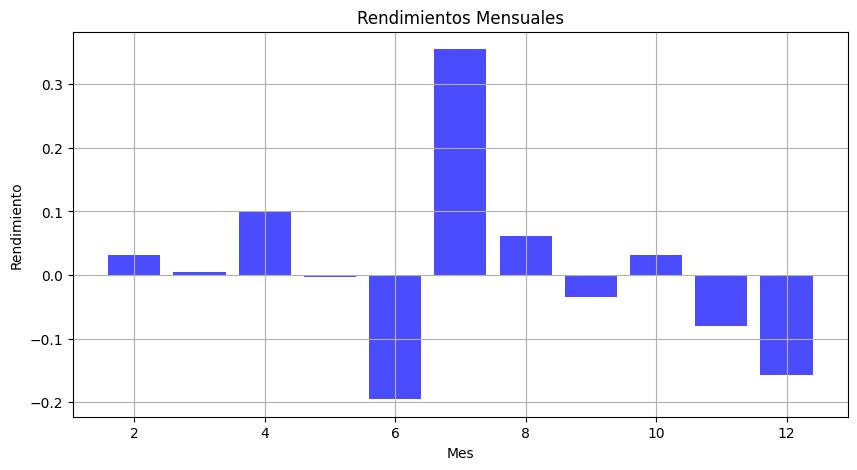

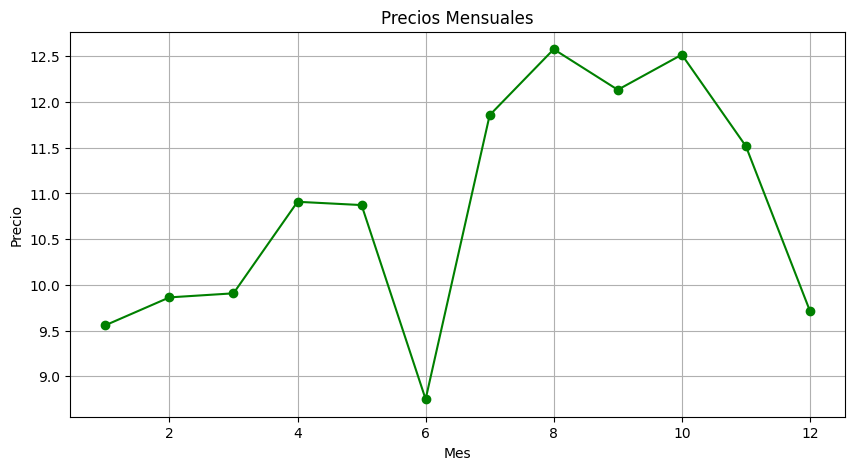

In [88]:
#4
import pandas as pd
import random
import matplotlib.pyplot as plt

# Crear una gráfica de barras para los rendimientos
plt.figure(figsize=(10, 5))
plt.bar(rendimientos.index, rendimientos['Precio'], color='b', alpha=0.7)
plt.title("Rendimientos Mensuales")
plt.xlabel("Mes")
plt.ylabel("Rendimiento")
plt.grid(True)

# Crear una gráfica de líneas para los precios
plt.figure(figsize=(10, 5))
plt.plot(precios_muestra.index, precios_muestra['Precio'], marker='o', color='g', linestyle='-', label='Precio')
plt.title("Precios Mensuales")
plt.xlabel("Mes")
plt.ylabel("Precio")
plt.grid(True)

# Mostrar ambas gráficas
plt.show()






In [89]:
#5
# Calcular rendimientos compuestos
rendimiento_compuesto = (rendimientos + 1).prod() - 1
rendimiento_compuesto
# Imprimir el resultado
print("Rendimiento compuesto:", rendimiento_compuesto)


# Anualizar los rendimientos
periodos_por_anio = 12  # Sabiendo que tienes datos mensuales
rendimientos_anualizados = rendimiento_compuesto * periodos_por_anio

print (rendimientos_anualizados)


Rendimiento compuesto: Precio    0.016399
dtype: float64
Precio    0.196787
dtype: float64


**Ejercicio 5:** Carga dos tickers y realiza los pasos del ejercicio anterior usando los tickers que elijas. Recuerda tomar en cuenta la ventana de tiempo que manejarás. Realiza un análisis estadístico (estadística descriptiva, histogramas y gráficas de series de tiempo).

In [90]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Descargar datos históricos para los tickers
tickers = ["AAPL", "GOOGL"]
start_date = "2022-12-31"
end_date = "2023-10-23"

datatickers = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
datatickers





[*********************100%%**********************]  2 of 2 completed


,AAPL,GOOGL
Date,,
2023-01-03,124.538658,89.120003
2023-01-04,125.823189,88.080002
2023-01-05,124.488869,86.199997
2023-01-06,129.069336,87.339996
2023-01-09,129.597076,88.019997
...,...,...
2023-10-16,178.720001,139.100006
2023-10-17,177.149994,139.720001
2023-10-18,175.839996,137.960007


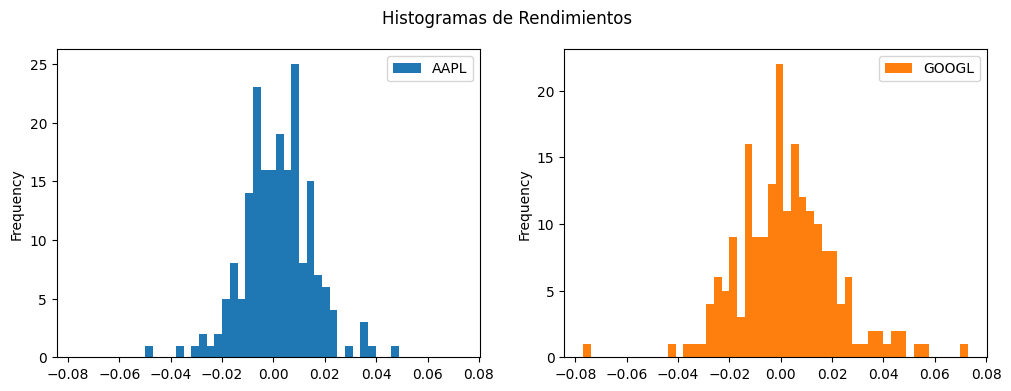

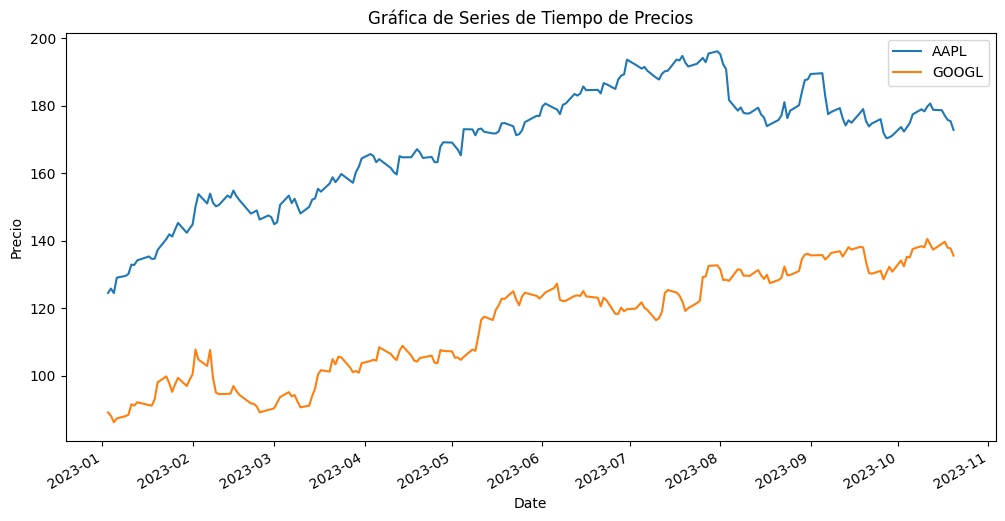

             AAPL       GOOGL
count  201.000000  201.000000
mean     0.001719    0.002270
std      0.013123    0.019046
min     -0.048020   -0.076830
25%     -0.006581   -0.009649
50%      0.001797    0.000855
75%      0.008846    0.012667
max      0.046927    0.072787


In [91]:
# Calcular rendimientos
rendimientosT = datatickers.pct_change().dropna()

# Análisis estadístico descriptivo
estadisticas = rendimientosT.describe()

# Histogramas de los rendimientos
rendimientosT.plot.hist(subplots=True, layout=(1, 2), bins=50, figsize=(12, 4))
plt.suptitle("Histogramas de Rendimientos")

# Gráficas de series de tiempo
datatickers.plot(figsize=(12, 6))
plt.title("Gráfica de Series de Tiempo de Precios")
plt.ylabel("Precio")

# Mostrar las gráficas
plt.show()

# Imprimir estadísticas descriptivas
print(estadisticas)

In [92]:
# Calcular rendimientos
rendimientosT = datatickers.pct_change().dropna()
print (rendimientosT)

# Calcular las desviaciones estadísticas
media_rendimientosT = rendimientosT.mean()
desviacionesT = (rendimientosT - media_rendimientosT) ** 2

# Calcular la volatilidad del portafolio
volatilidadT = desviacionesT.mean() ** 0.5

# Imprimir la volatilidad
print("Volatilidad del portafolio:", volatilidadT)

volatilidad_anualizadaT = volatilidadT * (201 ** 0.5)

# Imprimir la volatilidad anualizada
print("Volatilidad anualizada del portafolio:", volatilidad_anualizadaT)

# Calcular rendimientos compuestos
rendimiento_compuestoT = (rendimientosT + 1).prod() - 1
rendimiento_compuestoT
# Imprimir el resultado
print("Rendimiento compuesto:", rendimiento_compuestoT)


# Anualizar los rendimientos
periodos_por_anioT = 201  # Sabiendo que tienes datos de dias de mercado
rendimientos_anualizadosT = rendimiento_compuestoT * periodos_por_anioT

print("Rendimiento compuesto anualizado:", rendimientos_anualizadosT)

                AAPL     GOOGL
Date                          
2023-01-04  0.010314 -0.011670
2023-01-05 -0.010605 -0.021344
2023-01-06  0.036794  0.013225
2023-01-09  0.004089  0.007786
2023-01-10  0.004456  0.004544
...              ...       ...
2023-10-16 -0.000727  0.012667
2023-10-17 -0.008785  0.004457
2023-10-18 -0.007395 -0.012597
2023-10-19 -0.002161 -0.001522
2023-10-20 -0.014704 -0.015608

[201 rows x 2 columns]
Volatilidad del portafolio: AAPL     0.013091
GOOGL    0.018998
dtype: float64
Volatilidad anualizada del portafolio: AAPL     0.185591
GOOGL    0.269345
dtype: float64
Rendimiento compuesto: AAPL     0.388163
GOOGL    0.521544
dtype: float64
Rendimiento compuesto anualizado: AAPL      78.020840
GOOGL    104.830345
dtype: float64
